# Check Data

In [12]:
import matplotlib.pyplot as plt
import numpy as np

(281, 500, 3) 255 0
(281, 500, 4) [0.        0.5019608 0.7529412 0.8784314 1.       ]
(281, 500, 4) [0.        0.5019608 1.       ]


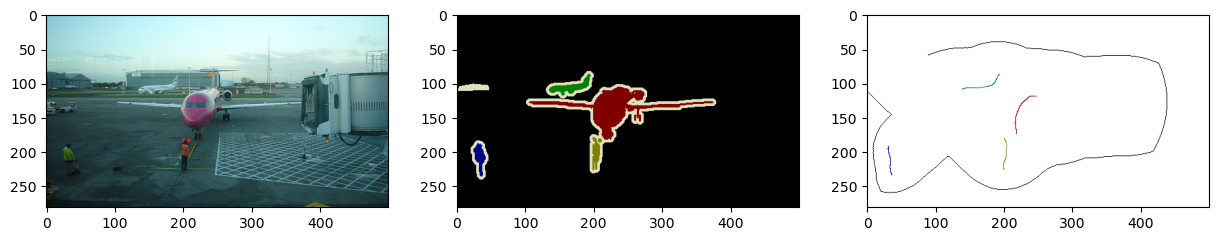

In [15]:
# read image
img = plt.imread("../Data/VOC2012/JPEGImages/2007_000032.jpg")
print(img.shape, img.max(), img.min())

# read its mask
mask = plt.imread("../Data/VOC2012/SegmentationObject/2007_000032.png")
print(mask.shape, np.unique(mask))

# read its scribble
scribble = plt.imread("../Data/VOC2012/PANet Data/ScribbleAugAuto/2007_000032.png")
print(scribble.shape, np.unique(scribble))

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(img)
ax2.imshow(mask)
ax3.imshow(scribble)

# Check Model Input

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from dataloaders.customized import voc_fewshot
from dataloaders.transforms import ToTensorNormalize

from util.utils import CLASS_LABELS


In [23]:
config = {
    'n_steps': 50,
    'batch_size': 1,
    'label_sets': 0,
    'path': {
        'VOC':{
            'data_dir': "../Data/VOC2012",
            'data_split': 'trainaug',
        }
    },
    'task': {
        'n_ways': 3,
        'n_shots': 5,
        'n_queries': 2,
    }
}

dataset = voc_fewshot(
    base_dir=config['path']['VOC']['data_dir'],
    split=config['path']['VOC']['data_split'],
    transforms=None,
    to_tensor=ToTensorNormalize(),
    labels=CLASS_LABELS['VOC'][config['label_sets']],
    max_iters=config['n_steps'] * config['batch_size'],
    n_ways=config['task']['n_ways'],
    n_shots=config['task']['n_shots'],
    n_queries=config['task']['n_queries']
)

trainloader = DataLoader(
    dataset,
    batch_size=config['batch_size'],
    shuffle=True,
    num_workers=1,
    pin_memory=True,
    drop_last=True
)

In [73]:
for i, sample_batched in enumerate(trainloader):
    [s_imgs, s_masks, q_imgs, q_labels] = [sample_batched['support_images'], sample_batched['support_mask'], 
                                       sample_batched['query_images'],sample_batched['query_labels']]
    
    print(len(s_imgs), len(s_masks), len(q_imgs), len(q_labels))
    print(len(s_imgs[0]), len(s_imgs[1]), len(s_masks[0]), len(s_masks[0]))
    print(s_imgs[0][0].shape, s_masks[0][0].keys())
    print([value.shape for value in s_masks[0][0].values()])
    print(q_imgs[0].shape, q_labels[0].shape)
    print(" ")
    
    if i == 1:
        break

3 3 2 2
5 5 5 5
torch.Size([1, 3, 375, 500]) dict_keys(['fg_mask', 'bg_mask', 'fg_scribble', 'bg_scribble'])
[torch.Size([1, 375, 500]), torch.Size([1, 375, 500]), torch.Size([1, 375, 500]), torch.Size([1, 375, 500])]
torch.Size([1, 3, 500, 375]) torch.Size([1, 500, 375])
 
3 3 2 2
5 5 5 5
torch.Size([1, 3, 375, 500]) dict_keys(['fg_mask', 'bg_mask', 'fg_scribble', 'bg_scribble'])
[torch.Size([1, 375, 500]), torch.Size([1, 375, 500]), torch.Size([1, 375, 500]), torch.Size([1, 375, 500])]
torch.Size([1, 3, 332, 500]) torch.Size([1, 332, 500])
 


In [89]:
s_image = s_imgs[1][2]
s_fg_mask = s_masks[1][2]['fg_mask']
s_bg_mask = s_masks[1][2]['bg_mask']
s_fg_scribble = s_masks[1][2]['fg_scribble']
s_bg_scribble = s_masks[1][2]['bg_scribble']
q_image = q_imgs[0]
q_label = q_labels[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


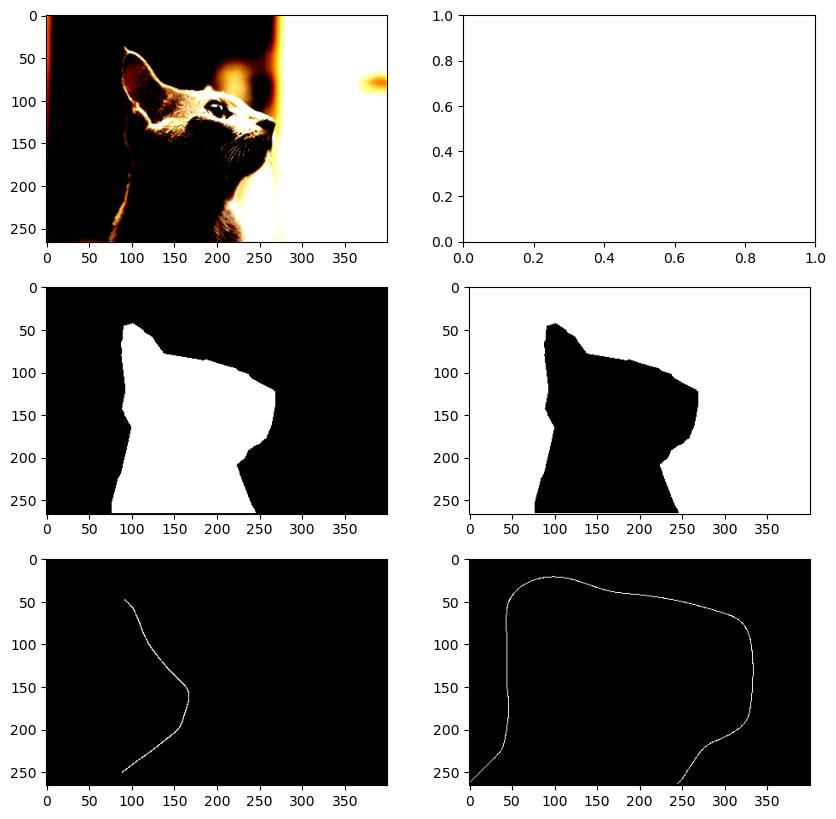

In [90]:
_, axs = plt.subplots(3, 2, figsize=(10,10))
axs[0][0].imshow(np.moveaxis(s_image.numpy().squeeze(), 0, -1))
axs[1][0].imshow(s_fg_mask.numpy().squeeze(), cmap='gray')
axs[1][1].imshow(s_bg_mask.numpy().squeeze(), cmap='gray')
axs[2][0].imshow(s_fg_scribble.numpy().squeeze(), cmap='gray')
axs[2][1].imshow(s_bg_scribble.numpy().squeeze(), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


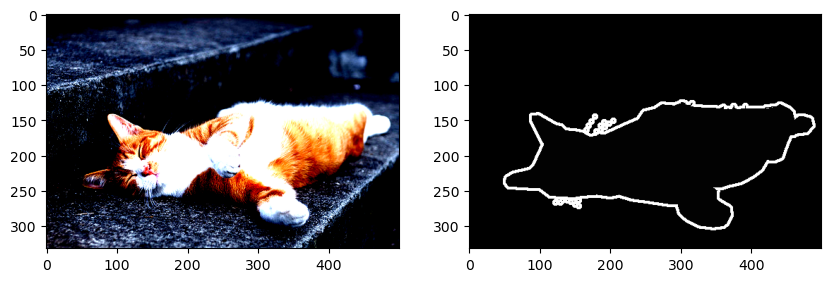

In [77]:
_, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(np.moveaxis(q_image.numpy().squeeze(), 0, -1))
axs[1].imshow(q_label.numpy().squeeze(), cmap='gray')

# Check Model Output Shape

In [1]:
import torch

In [10]:
N, Wa, H, W = 10, 3, 300, 400
 
pred = torch.zeros((N, Wa+1, H, W))
print(pred.shape)
output = torch.stack([pred, pred], dim=1) # N x B x (1 + Wa) x H x W
print(output.shape)
output = output.view(-1, *output.shape[2:])
print(output.shape)

torch.Size([10, 4, 300, 400])
torch.Size([10, 2, 4, 300, 400])
torch.Size([20, 4, 300, 400])
